# IMDB(Internet Movie Database)

In [ ]:
 from keras.datasets import imdb
 import numpy as np

 (train_data,train_labels), (test_data, test_labels)=imdb.load_data(num_words=10000) #훈련 데이터에서 가장 자주 등장한 단어 1만개로 제한했음

Using TensorFlow backend.


17465344/17464789 [==============================] - 2s 0us/step




*   IMDB(Internet Movie Database): 리뷰 5만 개로 이루어진 데이터셋
- 훈련 데이터 2만 5천개, 테스트 데이터 2만 5천개
- 각각 50%는 부정, 50%는 긍정 리뷰로 구성되어 있음
- 각 리뷰는 숫자 시퀀스로 변환되어 있음(문서에 나타난 단어에 고유한 번호를 부여)



## [ data와 label 구조 알아보기 ]

In [ ]:
print(train_data.shape)
print(train_labels.shape)

(25000,)
(25000,)


In [ ]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1




*   각 리뷰는 단어 인덱스의 리스트로 이루어진다.
- train, test label은 부정을 나타내는 0과, 긍정을 나타내는 1의 리스트로 구성된다. 













## [ data와 label을 텐서로 변환시키기 ]

In [ ]:
def vectorize_sequence(sequences, dimension=10000):
  results=np.zeros((len(sequences), dimension))     # 크기가 (len(sequences),dimension)이고 모든 원소가 0인 행렬
  for i, sequence in enumerate(sequences):
    results[i,sequence]=1.                          # results[i]에서 특정 인덱스의 위치를 1로 만듦
  return results

In [ ]:
x_train=vectorize_sequence(train_data)
x_test=vectorize_sequence(test_data)



*   리스트를 텐서로 바꾸기 위해서, 정수 시퀀스를 이진 행렬로 인코딩한다.



In [ ]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')



*   레이블을 벡터로 바꿔준다.
- np.asarray: 입력 데이터를 ndarray(같은 종류의 데이터를 담을 수 있는 다차원 배열)로 변환해준다.


In [ ]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

## [ 모델 구현 ]

In [ ]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))    #이진 분류 문제에서는 sigmoid 활성화 함수를 가진 Dense 층으로 끝나야 한다.

In [ ]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]



*   처음 본 데이터에 대한 모델의 정확도를 측정하기 위해서, 원본 훈련 데이터에서 일부를 가지고 검증 셋(validation set)을 만든다.
- 학습 데이터가 테스트 데이터에 비해 양이 많지 않으므로, 훈련 검증(validation)을 사용해야 한다.

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
history=model.fit(partial_x_train,partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))      #validation을 이용하여, epoch을 1번 돌때마다 검사하여 가중치를 수정한다.
                                                      #fit(모델 훈련)은 'training & validation data'를 이용하여 진행한다.

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.5023 - acc: 0.7893 - val_loss: 0.3790 - val_acc: 0.8669
Epoch 2/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.2984 - acc: 0.9042 - val_loss: 0.3002 - val_acc: 0.8907
Epoch 3/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.2194 - acc: 0.9315 - val_loss: 0.2804 - val_acc: 0.8901
Epoch 4/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.1715 - acc: 0.9462 - val_loss: 0.2889 - val_acc: 0.8844
Epoch 5/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.1422 - acc: 0.9532 - val_loss: 0.3217 - val_acc: 0.8737
Epoch 6/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.1142 - acc: 0.9655 - val_loss: 0.2960 - val_acc: 0.8878
Epoch 7/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.0967 - acc: 0.9717 - val_loss: 0.3176 - val_ac

(validation을 하지 않는 경우)

model.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc=moel.evaluate(test_images, test_labels)

---





*   fit(validation_split, validation_data)

- validation set을 사용하는 이유 (training set의 일부를 모델 성능 평가를 위해서 희생)

1.   training을 한 이후에 만들어진 해당 모형이 잘 예측하는지 성능을 예측하기 위해서
2.   이 희생을 감수하지 못할만큼 데이터 셋의 크기가 작으면, cross-validation을 진행
3.   '최종 모델'을 선정하기 위해 test accuracy를 가늠해 볼 수 있음

＊cross-validation: training set을 k-fold 방식을 통해 쪼개서 모든 데이터에 대해 training과 validation에 사용될 수 있게 한다.


---








*   validation set과 test set의 차이점

→ test set은 모델의 '최종 성능'을 평가하기 위해 쓰이고, training 과정에 관여하지 않는다.

→ validation set은 여러 모델 중에서 '최종 모델'을 선정하기 위해서 (training 과정에서) 성능 평가에 관여하는 것이다.



In [ ]:
history_dict=history.history # 위의 history 객체가 훈련하는 동안 발생한 모든 정보를 담고 있음
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])



*   history=model.fit( )으로 훈련하는 동안 'val_loss, val_acc, loss, acc'에 대한 정보가 생성되었음을 알 수 있다.



## [ trainin loss & validation loss ]

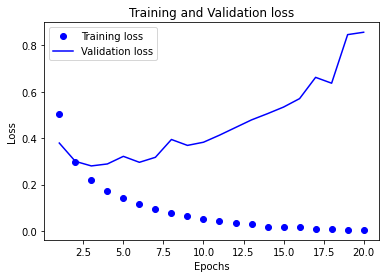

In [ ]:
import matplotlib.pyplot as plt

loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')       # bo: 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss')  # b: 파란색 실선
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()  # 그래프의 구분을 위해서, 각 그래프의 라벨명을 출력해준다.(왼쪽 상단위에 있는 박스)

plt.show()

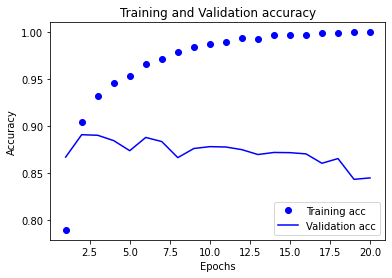

In [ ]:
plt.clf()  # 그래프 초기화

acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## [ 그래프 해석 ]


*   training(훈련)에 대해서는 예상했던 대로 정확도가 증가하고 손실이 감소하였다.
- validation(검증)에 대해서는 반대로 손실이 증가하고 정확도가 감소하였다.
- 두번째 epoch 이후부터 training set에 과도하게 최적화되어, training set 이외의 데이터에는 일반화되지 못하고 있다.

→ Overfitting(과대적합) 발생 : training set에 대해서는 잘 작동하지만, 처음 보는 데이터에 대해서는 잘 작동하지 않는다.




## [ 과대적합을 완화하기 위해 낮은 epochs로 모델 다시 훈련 ]

In [ ]:
model.fit(x_train,y_train,        #Train the model for a fixed number of epochs
          epochs=4,
          batch_size=512)

test_loss, test_acc=model.evaluate(x_test,y_test) #최종 모델 성능 평가(evaluate)는 'test data'를 이용하여 진행한다.
print('test_loss: ', test_loss)
print('test_acc: ', test_acc)

Epoch 1/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.4496 - acc: 0.8270
Epoch 2/4
25000/25000 [==============================] - 2s 69us/step - loss: 0.2578 - acc: 0.9100
Epoch 3/4
25000/25000 [==============================] - 2s 68us/step - loss: 0.1983 - acc: 0.9289
Epoch 4/4
25000/25000 [==============================] - 2s 61us/step
test_loss:  0.302583247461319
test_acc:  0.8807600140571594


In [ ]:
model.predict(x_test)

array([[0.21698296],
       [0.9998926 ],
       [0.9736787 ],
       ...,
       [0.14198208],
       [0.0911929 ],
       [0.7918478 ]], dtype=float32)


＊0 (음성 샘플): 부정적인 리뷰 / 1 (양성 샘플): 긍정적인 리뷰

*   predict( ) : 어떤 리뷰가 긍정(양성 샘플)일 확률을 예측한다.
- 이진 분류에서는 예측하려는 대상이 양성이 된다. (ex. 암 진단에서는 악성 종양이 양성 샘플)
